In [1]:
%matplotlib inline

In [2]:
#-------------------------------------------------------------------------------------------------------------------------------
# Input: Pa gene expression data from ArrayExpress (matrix: sample x gene)
# Data compression method: PCA or ICA
# Output: Reduced Pa gene expressiond ata (matrix: sample x 2 linear combination of genes)
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.decomposition import PCA, FastICA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
np.random.seed(123)

In [3]:
# load arguments
data_file = 'C:/Users/alexj/Documents/UPenn/CGreene/Pseudomonas/data/all-pseudomonas-gene-normalized.pcl'
map_file = 'C:/Users/alexj/Documents/UPenn/CGreene/Pseudomonas/metadata/mapping_sampleID_medium.txt'
component_num = 2

# specify either 'ica' or 'pca'
method = 'pca' 

In [4]:
# read in data
data = pd.read_table(data_file, header = 0, sep = '\t', index_col = 0)
data = pd.DataFrame(data)
X = data.transpose()
X.head(5)
#X.shape

Gene_symbol,PA0001,PA0002,PA0003,PA0004,PA0005,PA0006,PA0007,PA0008,PA0009,PA0010,...,PA5561,PA5562,PA5563,PA5564,PA5565,PA5566,PA5567,PA5568,PA5569,PA5570
0.1_12hr_CSV86(Pae_G1a).CEL,0.472897,0.396658,0.253776,0.000000,0.175640,0.554385,0.411370,0.382222,0.310144,0.642522,...,0.358597,0.390048,0.457406,0.684082,0.338351,0.608325,0.643496,0.276075,0.112773,0.145170
0.1_2hr_CSV86(Pae_G1a).CEL,0.262346,0.086216,0.359853,0.439214,0.269749,0.768433,0.212505,0.062043,0.567695,0.467073,...,0.358504,0.414206,0.389879,0.477693,0.000000,0.479385,0.154471,0.140891,0.167505,0.157060
0.1_6hr_CSV86(Pae_G1a).CEL,0.473658,0.244862,0.330750,0.097697,0.387226,0.328319,0.228820,0.330039,0.318081,0.512864,...,0.180744,0.380741,0.173501,0.251571,0.182793,0.528301,0.504985,0.499782,0.061106,0.365612
0.1_7hr_CSV86(Pae_G1a).CEL,0.439273,0.343402,0.192698,0.274677,0.628979,0.553796,0.431391,0.363480,0.385721,0.094584,...,0.346837,0.153927,0.067349,0.319723,0.282442,0.490655,0.531415,0.153880,0.132333,0.260087
0.1_9hr_CSV86(Pae_G1a).CEL,0.220827,0.145525,0.437803,0.293201,0.635120,0.462893,0.488733,0.309584,0.318646,0.591914,...,0.237726,0.301945,0.070222,0.513605,0.114277,0.360259,0.386868,0.223995,0.105343,0.102088


In [5]:
# PCA
if method == 'pca':
    reduced = PCA(n_components=component_num)
    reduced_X = reduced.fit_transform(X)
# ICA
else:
    reduced = FastICA(n_components=component_num)
    reduced_X = reduced.fit_transform(X)

In [6]:
# Map sample id to clinial phenotype (i.e. experimental condition)

# Note:
# According to the source (https://github.com/scikit-learn/scikit-learn/blob/14031f6/sklearn/decomposition/pca.py#L310),
# input will be transformed by np.array() before doing PCA. So row index will be lost during 
# PCA.fit_transform(X) even using a structured array or a pandas DataFrame. However, the order of the data is preserved, 
# meaning you can attach the index back afterward

X_ann = pd.DataFrame(reduced_X, index=X.index, columns=['1', '2'])

# read in mapping file (sample id --> phenotype)
map = pd.read_table(map_file, header = 0, sep = '\t', index_col = 0)

# Join 
X_new = pd.merge(X_ann, map, left_index=True, right_index=True)
X_new.head(10)
#X_new.shape

,1,2,medium
0.1_12hr_CSV86(Pae_G1a).CEL,11.110063,-5.150211,Mineral salt medium (MSM)
0.1_2hr_CSV86(Pae_G1a).CEL,11.268807,-5.561994,Mineral salt medium (MSM)
0.1_6hr_CSV86(Pae_G1a).CEL,11.298708,-5.218659,Mineral salt medium (MSM)
0.1_7hr_CSV86(Pae_G1a).CEL,11.681634,-5.657010,Mineral salt medium (MSM)
0.1_9hr_CSV86(Pae_G1a).CEL,11.331399,-5.350423,Mineral salt medium (MSM)
05_PA14000-4-2_5-10-07_S2.CEL,-7.735508,-5.421702,SCFM + lactate + glucose
120330-10978D_22_(Pae_G1a).CEL,1.068892,4.493387,M8-glutamate minimal medium + 0.2% glucose
120330-10978D_23_(Pae_G1a).CEL,0.916776,4.299317,M8-glutamate minimal medium + 0.2% glucose
120330-10978D_24_(Pae_G1a).CEL,1.141264,3.386041,M8-glutamate minimal medium + 0.2% glucose
120330-10978D_M1_(Pae_G1a).CEL,0.141128,3.567138,M8-glutamate minimal medium + 0.2% glucose


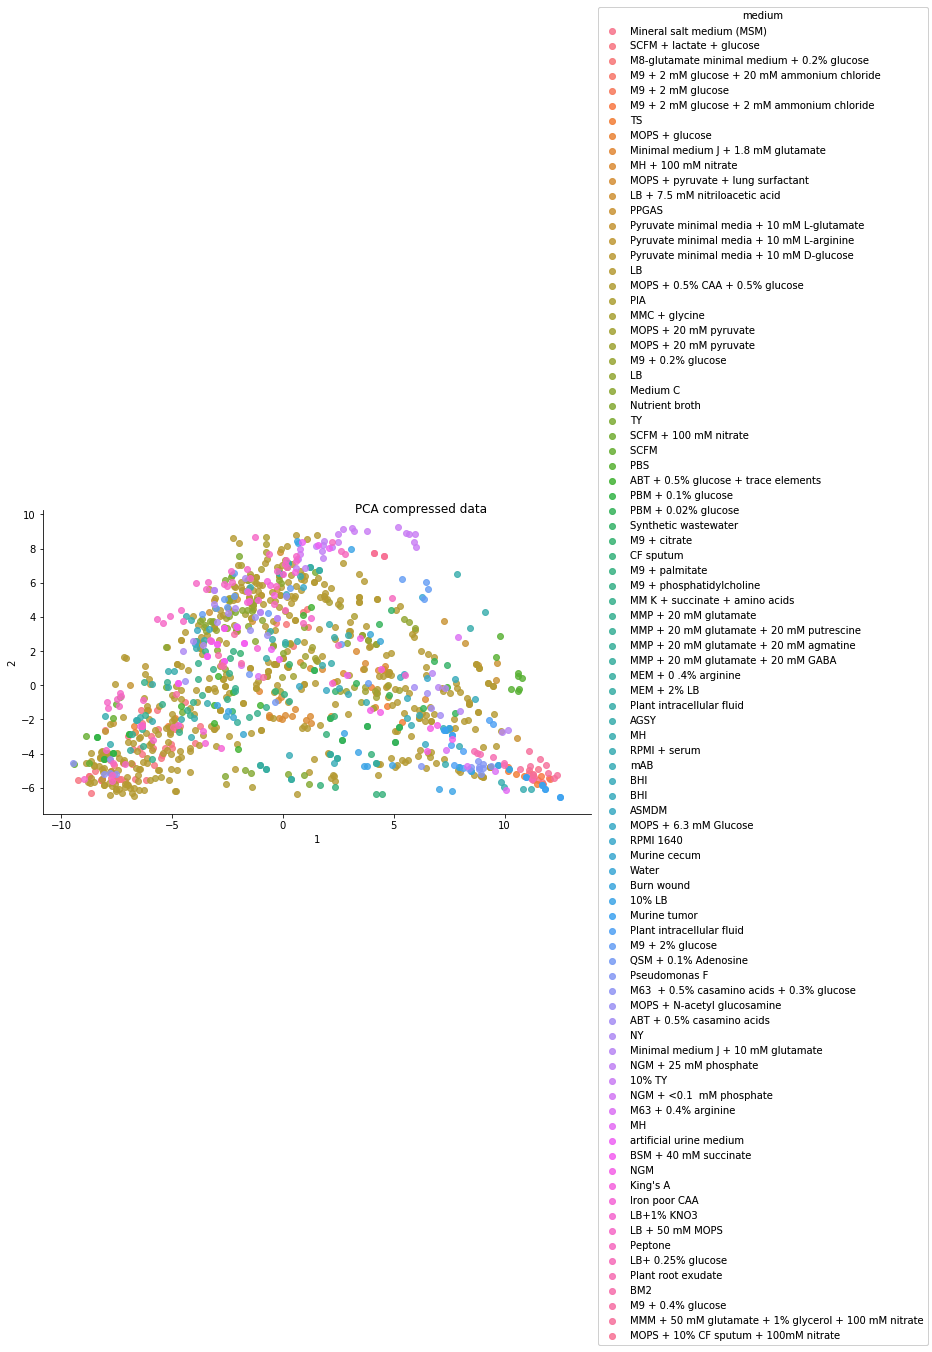

In [7]:
# Plot
fg = sns.lmplot(x = '1', y = '2', data = X_new, hue = 'medium', fit_reg = False)
fg.add_legend()
fig_file = 'C:/Users/alexj/Documents/UPenn/CGreene/Pseudomonas/viz/'+method+'.png'
fg.fig.suptitle(method.upper()+' compressed data')
fg.savefig(fig_file)

In [8]:
# Output compressed data
file_out = 'C:/Users/alexj/Documents/UPenn/CGreene/Pseudomonas/models/'+method+'_encoded.txt'
X_new.to_csv(file_out, sep='\t')